<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Предварительный-обзор-данных" data-toc-modified-id="Предварительный-обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предварительный обзор данных</a></span></li><li><span><a href="#Исследовательский-анализ-и-предобработка-данных" data-toc-modified-id="Исследовательский-анализ-и-предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Исследовательский анализ и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Цена-автомобиля" data-toc-modified-id="Цена-автомобиля-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Цена автомобиля</a></span></li><li><span><a href="#Тип-автомобильного-кузова" data-toc-modified-id="Тип-автомобильного-кузова-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Тип автомобильного кузова</a></span></li><li><span><a href="#Марка-автомобиля" data-toc-modified-id="Марка-автомобиля-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Марка автомобиля</a></span></li><li><span><a href="#Модель-автомобиля" data-toc-modified-id="Модель-автомобиля-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Модель автомобиля</a></span></li><li><span><a href="#Тип-топлива" data-toc-modified-id="Тип-топлива-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Тип топлива</a></span></li><li><span><a href="#Была-ли-машина-в-ремонте" data-toc-modified-id="Была-ли-машина-в-ремонте-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Была ли машина в ремонте</a></span></li><li><span><a href="#Тип-коробки-передач" data-toc-modified-id="Тип-коробки-передач-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span>Тип коробки передач</a></span></li><li><span><a href="#Количество-дней-между-созданием-анкеты-и-последним-визитом-пользователя" data-toc-modified-id="Количество-дней-между-созданием-анкеты-и-последним-визитом-пользователя-1.2.8"><span class="toc-item-num">1.2.8&nbsp;&nbsp;</span>Количество дней между созданием анкеты и последним визитом пользователя</a></span></li><li><span><a href="#Год-регистрации-автомобиля" data-toc-modified-id="Год-регистрации-автомобиля-1.2.9"><span class="toc-item-num">1.2.9&nbsp;&nbsp;</span>Год регистрации автомобиля</a></span></li><li><span><a href="#Месяц-регистрации-автомобиля" data-toc-modified-id="Месяц-регистрации-автомобиля-1.2.10"><span class="toc-item-num">1.2.10&nbsp;&nbsp;</span>Месяц регистрации автомобиля</a></span></li><li><span><a href="#Мощность" data-toc-modified-id="Мощность-1.2.11"><span class="toc-item-num">1.2.11&nbsp;&nbsp;</span>Мощность</a></span></li><li><span><a href="#Пробег" data-toc-modified-id="Пробег-1.2.12"><span class="toc-item-num">1.2.12&nbsp;&nbsp;</span>Пробег</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.2.13"><span class="toc-item-num">1.2.13&nbsp;&nbsp;</span>Обработка пропусков</a></span></li></ul></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

In [1]:
# !pip install -U missingno
# !pip install -U optuna
# !pip install phik -U
# !pip install category-encoders
# !pip install -U fuzzywuzzy[speedup]

## Подготовка данных

In [2]:
import os
import re
import time
import warnings

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import optuna
import pandas as pd
import phik
import seaborn as sns
from category_encoders import QuantileEncoder
from category_encoders.sum_coding import SumEncoder
from category_encoders.target_encoder import TargetEncoder
from fuzzywuzzy import fuzz
from IPython.display import HTML, display
from lightgbm import LGBMRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import (KFold, StratifiedKFold, cross_val_score,
                                     cross_validate, train_test_split)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (LabelEncoder, OneHotEncoder,
                                   PolynomialFeatures, StandardScaler)
from tqdm import tqdm

In [3]:
SEED = 12345

display(HTML('<style>.container { width:90% !important; }</style>'))
optuna.logging.set_verbosity(optuna.logging.WARNING)
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

### Предварительный обзор данных

In [4]:
def get_df(file_name):
    path_to_file = os.path.relpath(os.path.join('datasets/', file_name))
    if not os.path.isfile(path_to_file):
        raise Exception('Данные отсутствуют')
    return pd.read_csv(path_to_file)

In [5]:
df = get_df('autos.csv')
pd.set_option('display.max_columns', None)

In [6]:
df.info()
df.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
97240,2016-03-15 14:06:27,2400,wagon,2000,manual,179,a6,150000,3,gasoline,audi,no,2016-03-15 00:00:00,0,35435,2016-04-06 02:45:46
78219,2016-03-22 08:51:47,700,small,1999,manual,60,other,150000,7,petrol,honda,NaN,2016-03-22 00:00:00,0,99831,2016-04-05 20:18:52
249955,2016-03-24 17:38:18,1900,sedan,2001,manual,60,NaN,150000,5,NaN,volkswagen,no,2016-03-24 00:00:00,0,89077,2016-03-24 17:38:18
327937,2016-03-10 19:56:18,1299,bus,2002,manual,75,other,150000,7,petrol,mazda,yes,2016-03-10 00:00:00,0,54441,2016-03-12 11:18:17
186970,2016-03-06 00:36:59,1150,small,1998,manual,0,lupo,150000,12,petrol,volkswagen,NaN,2016-03-05 00:00:00,0,24890,2016-03-18 03:47:36
100384,2016-03-18 20:43:12,2390,small,2009,manual,54,c1,150000,5,gasoline,citroen,no,2016-03-18 00:00:00,0,12359,2016-04-05 22:47:11
286603,2016-03-23 21:54:44,1350,sedan,1998,manual,0,carisma,125000,11,petrol,mitsubishi,no,2016-03-23 00:00:00,0,10629,2016-03-26 17:15:17
18927,2016-03-10 20:55:08,599,wagon,1999,auto,150,other,150000,12,petrol,saab,yes,2016-03-10 00:00:00,0,18181,2016-03-22 21:16:34
10661,2016-03-21 18:58:50,1590,small,2006,manual,52,matiz,150000,6,petrol,chevrolet,no,2016-03-21 00:00:00,0,45770,2016-03-28 16:17:14
19559,2016-03-29 19:51:30,2200,NaN,2017,auto,0,other,150000,0,gasoline,mercedes_benz,NaN,2016-03-29 00:00:00,0,49661,2016-04-06 06:15:24


Переведём названия столбцов из `CamelCase` в `snake_case`

In [7]:
def camel_to_snake(cols):
    return map(lambda col: re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower(), cols)

In [8]:
df.columns = camel_to_snake(df.columns)
df.sample(5)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
222950,2016-04-01 12:39:12,3750,small,2005,manual,68,aygo,80000,11,petrol,toyota,no,2016-04-01 00:00:00,0,7646,2016-04-07 08:46:06
222025,2016-03-05 14:55:32,19500,wagon,2008,auto,235,5er,150000,5,gasoline,bmw,no,2016-03-05 00:00:00,0,33442,2016-03-17 22:47:45
288791,2016-03-13 07:36:44,3800,bus,2002,manual,82,other,150000,0,gasoline,renault,yes,2016-03-13 00:00:00,0,1809,2016-04-06 13:46:15
213466,2016-03-07 13:38:33,2490,sedan,2004,manual,116,3er,150000,5,petrol,bmw,no,2016-03-07 00:00:00,0,6712,2016-03-13 01:46:17
44845,2016-04-05 12:46:40,999,NaN,2017,manual,90,scenic,150000,8,petrol,renault,NaN,2016-04-05 00:00:00,0,52445,2016-04-05 12:46:40


In [9]:
df[['date_created', 'date_crawled', 'last_seen']] = (
    df[['date_created', 'date_crawled', 'last_seen']]
    .apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')
)
df[['date_created', 'date_crawled', 'last_seen']].sample(5)

,date_created,date_crawled,last_seen
75989,2016-04-01,2016-04-01 15:51:41,2016-04-07 13:50:15
138264,2016-03-24,2016-03-24 21:50:43,2016-04-01 20:18:27
204077,2016-03-12,2016-03-12 09:48:20,2016-04-07 12:15:55
304814,2016-03-14,2016-03-14 20:44:49,2016-04-06 08:15:59
174488,2016-03-09,2016-03-10 00:32:23,2016-03-21 10:16:27


Разница между значениями `last_seen` и `date_created` указывает на то, как долго пользователь продаёт автомобиль,  
что, в свою очередь, позволяет оценить насколько адекватна цена транспортного средства.

In [10]:
df['days_since_creation'] = (df['last_seen'] - df['date_created']).dt.days

Извлечём из даты значения года, месяца и дня. Создадим соответствующие признаки.

In [11]:
for time_col in ('created', 'crawled'):
    df[f'year_{time_col}'] = df[f'date_{time_col}'].dt.year.astype('int16')
    df[f'month_{time_col}'] = df[f'date_{time_col}'].dt.month.astype('int8')
    df[f'day_{time_col}'] = df[f'date_{time_col}'].dt.day.astype('int8')

df = df.drop(['date_created', 'date_crawled', 'last_seen'], axis=1)

In [12]:
title_dict = {
    'price': ['цены', 'Цена'],
    'vehicle_type': ['по типу автомобильного кузова',
                     'Тип автомобильного кузова'],
    'registration_year': ['регистраций по годам',
                          'Год регистрации автомобиля'],
    'gearbox': ['по типу трансмиссии', 'Тип коробки передач'],
    'power': ['мощностей (л. с.)', 'Мощность'],
    'kilometer': ['по пробегy (км)', 'Пробег'],
    'registration_month': ['регистраций по месяцам',
                           'Месяц регистрации автомобиля'],
    'fuel_type': ['по типу топлива', 'Тип топлива'],
    'brand': ['по самым популярным маркам', 'Марка автомобиля'],
    'repaired': ['в зависимости от состояния автомобиля', 'Факт ремонта'],
    'number_of_pictures': ['количества фотографий автомобиля',
                           'Количество фотографий'],
    'postal_code': ['почтовых индексов владельцев анкеты', 'Почтовый индекс'],
    'days_since_creation': ['времени, прошедшего между последним визитом\n'
                            'пользователя и датой создания анкеты',
                            'Количество дней'],
    'year_created': ['количества созданных анкет по годам',
                     'Год создания анкеты'],
    'month_created': ['количества созданных анкет по месяцам',
                     'Месяц создания анкеты'],
    'day_created': ['количества созданных анкет по дням',
                    'День создания анкеты'],
    'year_crawled': ['количества скачанных анкет по годам',
                     'Год скачивания анкеты из базы'],
    'month_crawled': ['количества скачанных анкет по месяцам',
                     'Месяц скачивания анкеты из базы'],
    'day_crawled': ['количества скачанных анкет по дням',
                    'День скачивания анкеты из базы'],
}


def get_overview_histogram(df, col, ax, bins_num='auto', line_color='r',
                           color=None):
    ax.set_title(f'Распределение {title_dict[col][0]}')
    median = df[col].median()
    mean = df[col].mean()
    sns.histplot(df[col], kde=True, color=color, bins=bins_num, ax=ax)
    ax.axvline(x=median, c=line_color, label='Медиана')
    ax.axvline(x=mean, c=line_color, ls='--', label='Среднее')
    ax.set_ylabel('Количество')
    ax.set_xlabel(title_dict[col][1])

def get_overview(df):
    rows_num = df.shape[1] // 3 + 1
    fig, axs = plt.subplots(rows_num, 3, figsize=(15, 12))
    axis_to_del = 3 - df.shape[1] % 3
    while axis_to_del:
        fig.delaxes(axs[-1][-axis_to_del])
        axis_to_del -= 1

    cols = df.columns
    for col, ax in tqdm(zip(cols, axs.flat)):
        get_overview_histogram(df, col, ax)

    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.52, 1), fontsize=11)
    plt.show()

,price,registration_year,power,kilometer,registration_month,number_of_pictures,postal_code,days_since_creation,year_created,month_created,day_created,year_crawled,month_crawled,day_crawled
0.0015,0.0,1960.0,0.0,5000.0,0.0,0.0,1157.0,0.0,2016.0,3.0,1.0,2016.0,3.0,1.0
0.9985,19999.0,2018.0,476.0,150000.0,12.0,0.0,99869.0,33.0,2016.0,4.0,31.0,2016.0,4.0,31.0


14it [01:00,  4.31s/it]


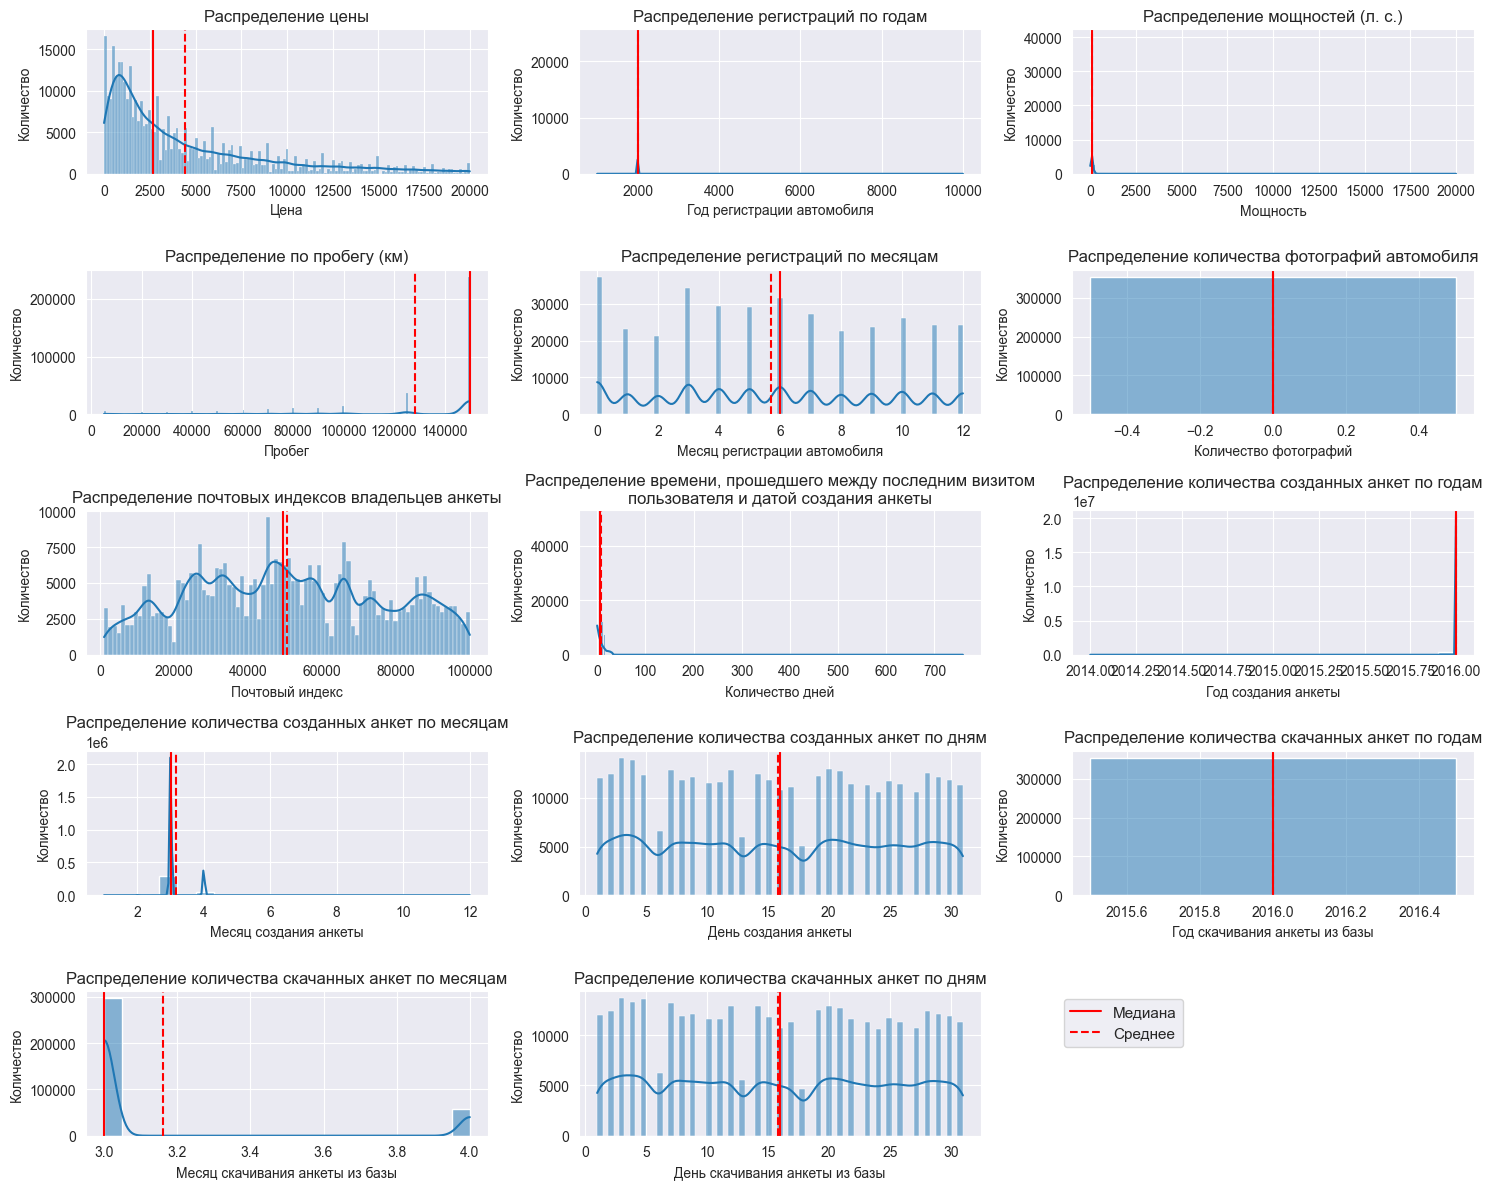

CPU times: total: 1min 23s
Wall time: 1min 23s


In [13]:
%%time
columns = df.select_dtypes(include=np.number).columns.tolist()
display(df[columns].quantile([.0015, .9985]))
get_overview(df[columns])

Столбец `number_of_pictures` полностью состоит из нулей.  
Все анкеты были скачаны в 2016-м году.  
Удалим неинформативные признаки

In [14]:
df = df.drop(['number_of_pictures', 'year_crawled'], axis=1)

Остальные малоинформативные признаки пока удалять не будем: они нам могут понадобиться при исследовании пропусков.

In [15]:
duplicated = df.duplicated().sum()
print(f'Количество явных дубликатов: {duplicated}')

Количество явных дубликатов: 6828


Приведём типы данных

In [16]:
notna_columns = df[df.columns[~df.isna().any()]].columns
num_cols = df[notna_columns].select_dtypes(include=np.number).columns

df[num_cols] = df[num_cols].apply(pd.to_numeric, downcast='integer')

**Вывод**:  
- датасет состоит из 354369 объектов, содержит 7 числовых и 9 категориальных переменных;  
- приведены типы данных;  
- обнаружены аномальные значения, выбросы, явные дубликаты и большое количество пропусков;  
- удалены неинформативные признаки.

### Исследовательский анализ и предобработка данных

In [17]:
before_preprocessing = df.shape[0]

In [18]:
def get_missing_values_percentage(df):
    percent_missing = df.isna().mean() * 100
    percent_missing.sort_values(inplace=True, ascending=False)
    return percent_missing.drop(percent_missing[percent_missing == 0].index)


def get_missing_values_barplot(df):
    temp = get_missing_values_percentage(df)
    plt.figure(figsize=(10, 2))
    pal = sns.color_palette('Blues', len(temp))
    ax = sns.barplot(y=temp.index, x=temp.values, hue=temp.index,
                     palette=pal[::-1], dodge=False)
    plt.ylabel('')
    plt.title(f'Процент пропущенных значений по стобцам')
    plt.yticks(fontsize=12)
    for item in ax.patches:
        if not np.isnan(item.get_width()):
            plt.text(item.get_width(), item.get_y(),
                     f'{item.get_width():.1f}%', va='top',
                     fontsize=12)

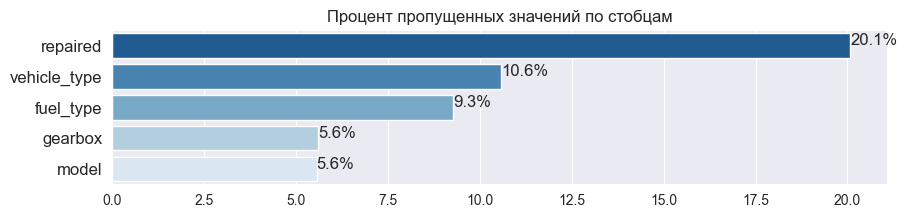

In [19]:
get_missing_values_barplot(df)

In [20]:
(
    df.groupby('brand')[['fuel_type', 'model', 'gearbox',
                         'vehicle_type', 'repaired']]
    .apply(lambda x: x.isna().mean() * 100)
)

,fuel_type,model,gearbox,vehicle_type,repaired
brand,,,,,
alfa_romeo,9.593777,5.920484,5.704408,10.717373,17.242869
audi,7.631722,4.355649,4.443916,8.191879,18.383351
bmw,7.953622,5.241914,3.963266,7.612288,17.841469
chevrolet,8.722919,6.271380,5.473204,7.696693,17.730901
chrysler,8.547603,6.184851,4.308548,9.242530,19.874913
citroen,8.158508,4.836830,5.244755,10.295260,19.308469
dacia,6.555556,2.444444,2.444444,5.666667,11.444444
daewoo,12.730627,8.487085,6.273063,14.391144,22.509225
daihatsu,11.910670,4.838710,6.699752,12.531017,23.821340


У категории `sonstige_autos`  столбец `model` полностью состоит из пропусков. Вероятно, в ней собраны редкие марки автомобилей, которые можно считать выбросами. Удалим их.

In [21]:
df = df.drop(df.query('brand == "sonstige_autos"').index, axis=0)

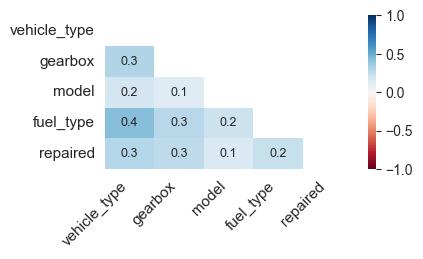

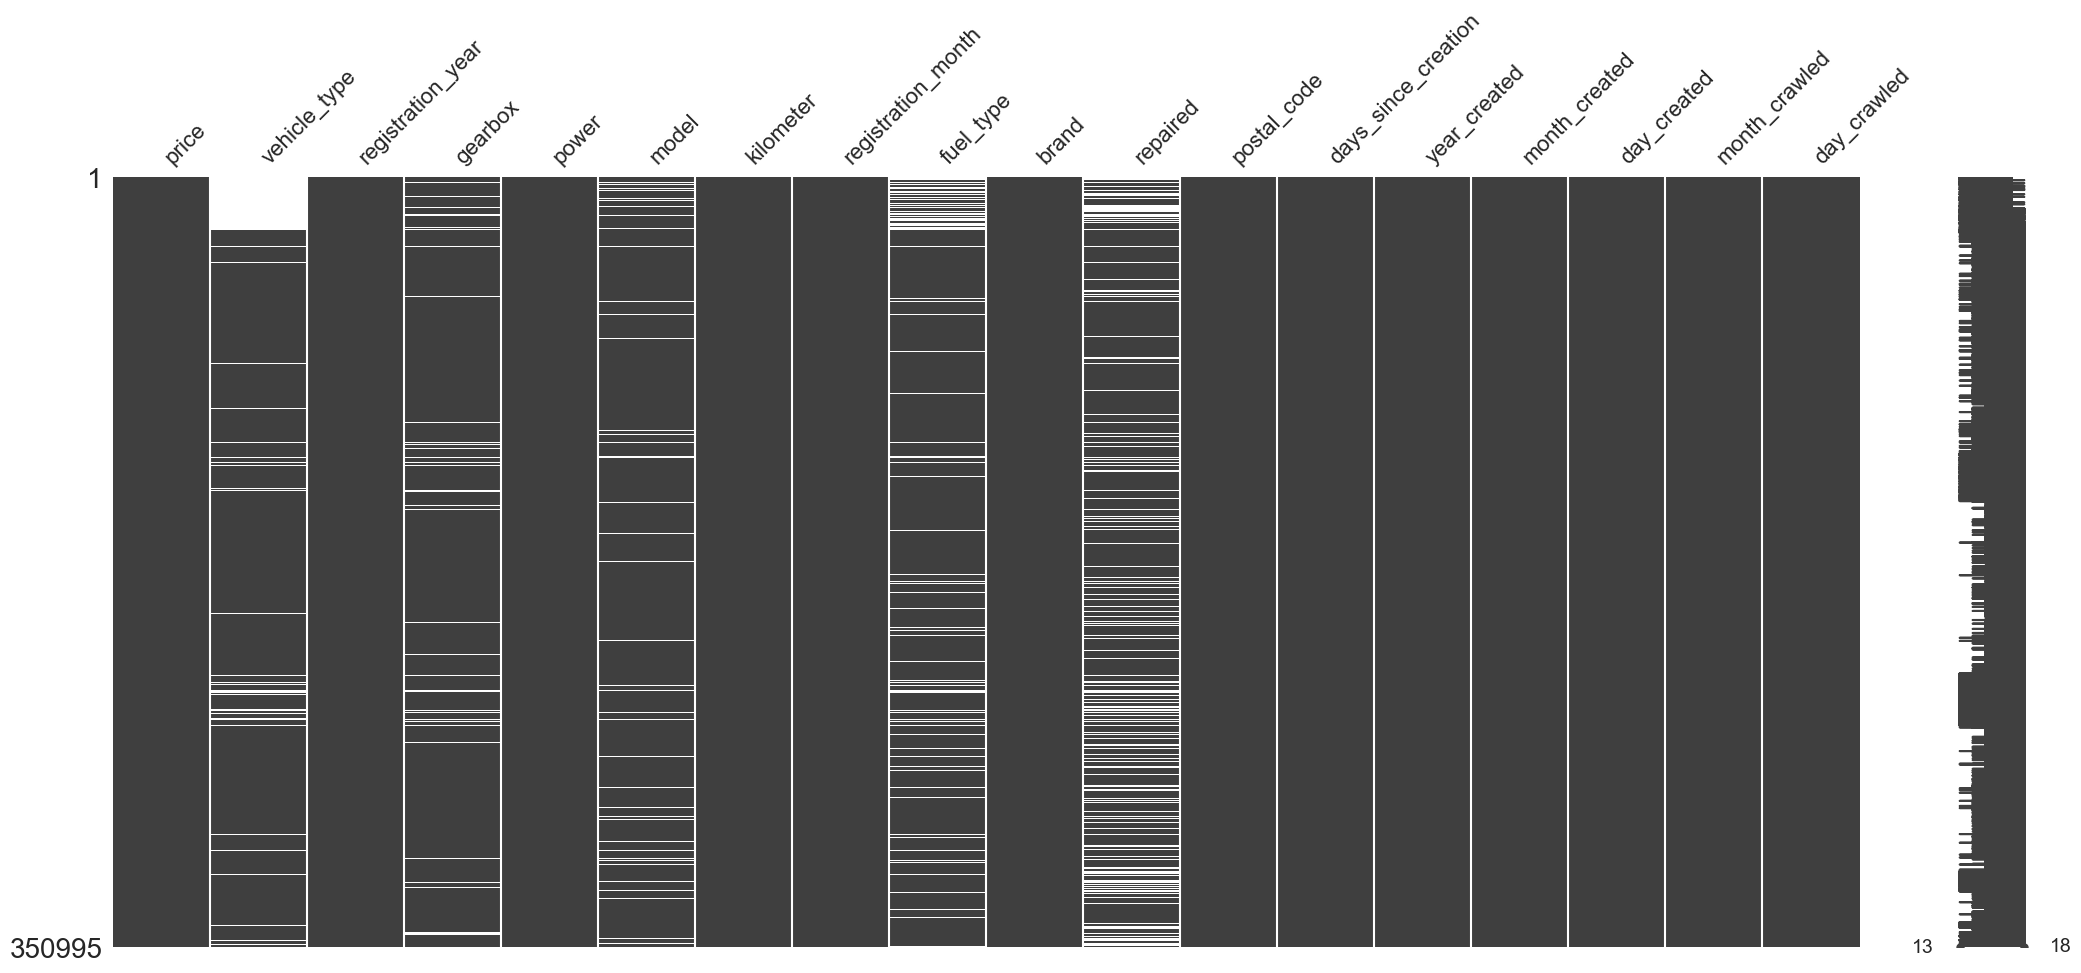

In [22]:
msno.heatmap(df, fontsize=11, figsize=(4, 2))
msno.matrix(df.sort_values(by='registration_year', ascending=False));

In [23]:
for sign in ('<', '>='):
    print(
        df.fillna(-1).query(f'registration_year {sign} 2001')['repaired']
        .value_counts(normalize=True)
    )

no     0.594676
-1     0.262329
yes    0.142995
Name: repaired, dtype: float64
no     0.756538
-1     0.163998
yes    0.079464
Name: repaired, dtype: float64


Сильная взаимосвязь между пропусками в столбцах отсутствует.   
В колонке `repaired` доля пропусков значительно выше среди автомобилей до 2001-го года регистрации.  
В столбцах `vehicle_type`, `repaired` и `fuel_type` существенная часть пропусков приходится на значения года регистрации, превышающие 2016.  
Причины подобного распределения пропусков рассмотрим в ходе дальнейшего анализа.

In [24]:
%%time
phik_overview = df.phik_matrix(interval_cols=['price', 'power'])

CPU times: total: 5.67 s
Wall time: 2min 10s


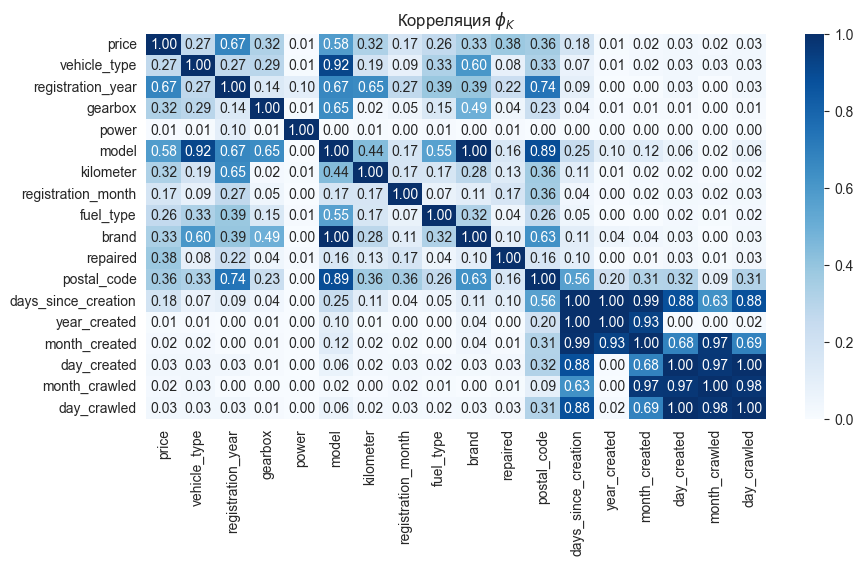

In [25]:
plt.figure(figsize=(10, 5))
sns.heatmap(data=phik_overview, fmt='.2f', cmap='Blues', annot=True)
plt.title('Корреляция $\phi_K$')
plt.show()

Наибольшее влияние на цену оказывают год регистрации и модель автомобиля.

In [26]:
def get_median_values(df, col):
    median_values = df.pivot_table(index=col, values='price', aggfunc=['median'])
    median_values.columns = ['median']
    median_values = median_values.sort_values(by='median')
    return median_values


def get_count_by_group(df, col):
    total_count = df.shape[0]
    count_by_group = \
        df.pivot_table(index=col, values='month_created', aggfunc='count')
    count_by_group['percentage'] = \
        round(count_by_group['month_created'] / total_count * 100, 2)
    count_by_group.columns = ['count', 'percentage']
    return count_by_group


def get_barplot(df, col, order, ax, count_by_group):
    sns.barplot(data=count_by_group, x=count_by_group.index,
                y='count', color='lightslategray', alpha=.2, order=order,
                dodge=False, ax=ax)
    for p, values in zip(ax.patches, count_by_group.loc[order].values):
        count, percent = values
        ax.annotate(f'{count:.0f} ({percent:.2f}%)',
                    (p.get_x(), p.get_height() * 1.005))

def get_top_brands(data, col, brands_sorted, num):
    if num > 0:
        return data.loc[data['brand'].isin(brands_sorted[:num])]
    return data.loc[data['brand'].isin(brands_sorted[num:])]


def get_boxplot(data, col, f_dec=.2, fig_size=(15, 5), top_ten=10):
    count_by_group = get_count_by_group(data, col)
    groups = count_by_group.index
    title = title_dict[col][0]
    if col == 'brand':
        groups = \
            count_by_group.sort_values(by='count', ascending=False).index
        data = get_top_brands(data, col, groups, top_ten)
        local_dict = {
            10: title,
            -10: 'по наименее популярным маркам'
        }
        title = local_dict[top_ten]
    median_values = get_median_values(data, col)
    order = median_values.index

    fig, axs = plt.subplots(2, 1, figsize=fig_size, sharex=True,
                            gridspec_kw={'height_ratios': [3, 1]})
    circles = dict(markerfacecolor='cadetblue',
                   marker='o', markeredgecolor='white')
    pal = sns.color_palette('ch:s=.25,rot=-.25', len(order))
    sns.boxplot(data=data, x=col, y='price', hue=col, hue_order=order,
                showmeans=True, order=order, palette=pal, linewidth=0.5,
                medianprops=dict(color='w'), flierprops=circles,
                dodge=False, ax=axs[0])
    legend = axs[0].get_legend()
    if legend:
        legend.remove()
    for i in range(median_values.shape[0]):
        genre_median = median_values['median'].iloc[i]
        axs[0].text(i-0.15, genre_median+genre_median*0.01,
                 f'{genre_median:{f_dec}f}', color='w', fontweight='bold')

    if col == 'registration_month':
        title = {}
        title = 'по месяцам регистрации'
    axs[0].set_ylabel('Цена')
    axs[0].set_title(f'Распределение цены автомобиля {title}')
    

    get_barplot(data, col, order, axs[1], count_by_group.loc[groups])
    axs[1].set_ylabel('')
    axs[1].set_xlabel(title_dict[col][1])


def add_median_prices(df, col, ax, plot_style='o'):
    median_prices = \
        df.pivot_table(index=col, values='price', aggfunc='median')
    median_prices.columns = ['Медианная цена']
    ax = ax.twinx()
    median_prices.plot(style=plot_style, c='cadetblue', alpha=.7, ax=ax)
    ax.set_ylabel('Медианная цена')
    ax.legend(loc='upper right')
    ax.grid(False)

def get_histogram(df, col, bins_num='auto', fig_size=(15, 5)):
    fig, axs = plt.subplots(2, 1, figsize=fig_size, sharex=True,
                            gridspec_kw={'height_ratios': [3, 1]})
    get_overview_histogram(df, col, axs[0], bins_num)
    red_circle = dict(
        markerfacecolor='red', marker='o', markeredgecolor='white'
    )
    legend_loc = 'best'
    if col in ('registration_year', 'power',
               'kilometer', 'days_since_creation'):
        add_median_prices(df, col, axs[0])
        legend_loc = 'upper left'
    axs[0].legend(loc=legend_loc)
    
    ax = axs[1]
    df[col].plot.box(flierprops=red_circle, ax=ax, vert=False)
    ax.set_yticks([])
    ax.set_xlabel(title_dict[col][1])
    plt.tight_layout()

In [27]:
def get_similar_values(models_by_brand,  words_to_omit,
                       attr='partial_ratio', lim=80,):
    models = [model for models in models_by_brand.values()
             for model in models]
    models = list(reversed(sorted(models)))
    similar_values = {}
    processed = []
    while len(models) > 1:
        model = models.pop()
        if (model not in processed
            and not any(word in model for word in words_to_omit)):
            matches = filter(
                lambda other:
                getattr(fuzz, attr)(model, other) > lim, models
            )
            matches = list(matches)
            if matches != []:
                processed.extend(matches)
                similar_values[model] = matches
    return similar_values

#### Цена автомобиля

,count,mean,std,min,25%,50%,75%,max
price,350995.0,4410.798795,4503.345959,0.0,1099.0,2700.0,6399.0,20000.0


,0.05,0.95
price,200.0,14500.0


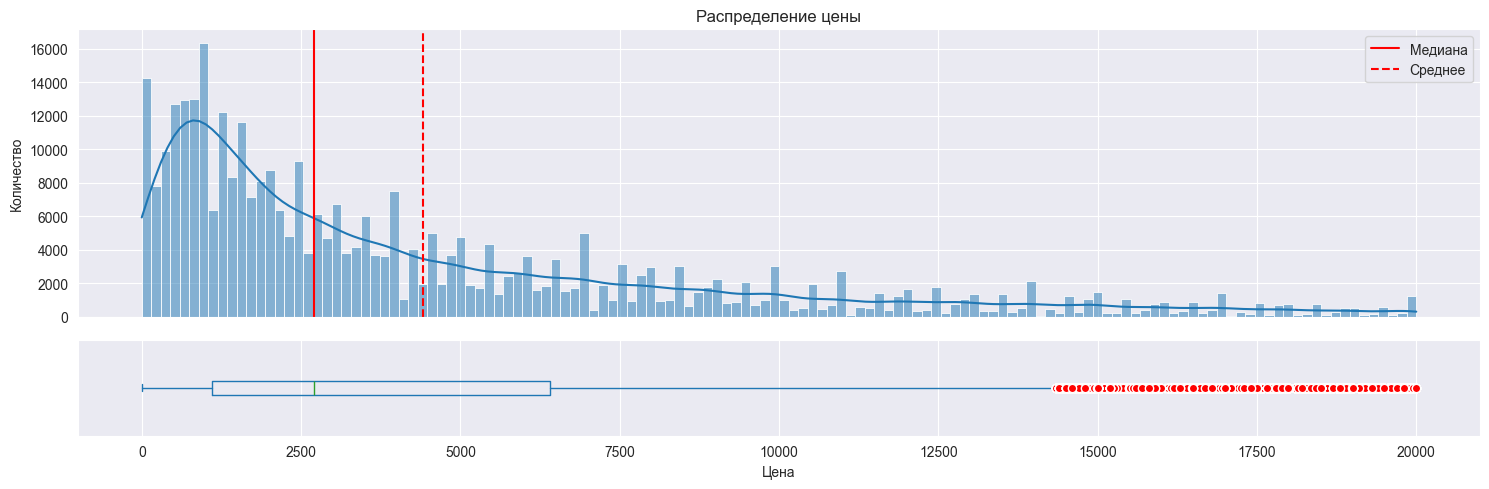

In [28]:
display(df['price'].describe().to_frame().T)
display(df[['price']].quantile([.05, .95]).T)
get_histogram(df, 'price')

In [29]:
df.loc[df['price'] == 0, 'price'] = float('nan')
df['price'].isna().mean()

0.029188449977919913

Нулевые значения в целевом признаке являются аномалиями.  
Вероятно, ноль использовался в качестве заглушки для пропусков.  
Выбросить машину в Германии - удовольствие не из дешёвых, поэтому низкие значения цены не будем считать аномалией.

In [30]:
df = df.dropna(subset=['price'])
df['price'].isna().sum()

0

#### Тип автомобильного кузова

[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']


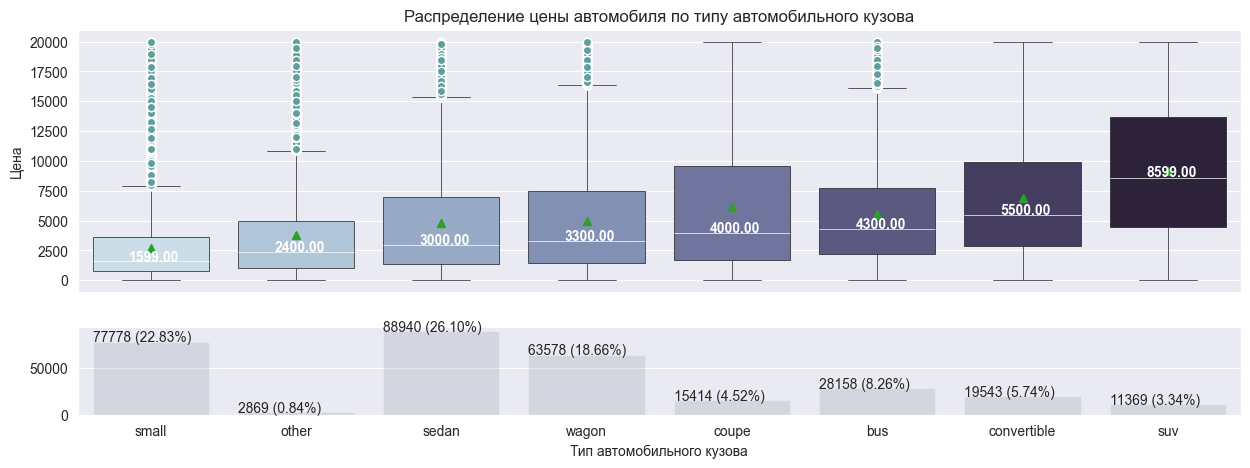

In [31]:
print(df['vehicle_type'].unique())
get_boxplot(df, 'vehicle_type')

Основная доля продаж приходится на классы `sedan`, `small` и `wagon`.  
Распределения цен на автомобили значительно отличаются в зависимости от типа кузова.

#### Марка автомобиля

['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'alfa_romeo' 'subaru' 'volvo' 'mitsubishi' 'kia'
 'suzuki' 'lancia' 'toyota' 'chevrolet' 'dacia' 'daihatsu' 'trabant'
 'chrysler' 'jaguar' 'daewoo' 'porsche' 'rover' 'saab' 'land_rover' 'lada']


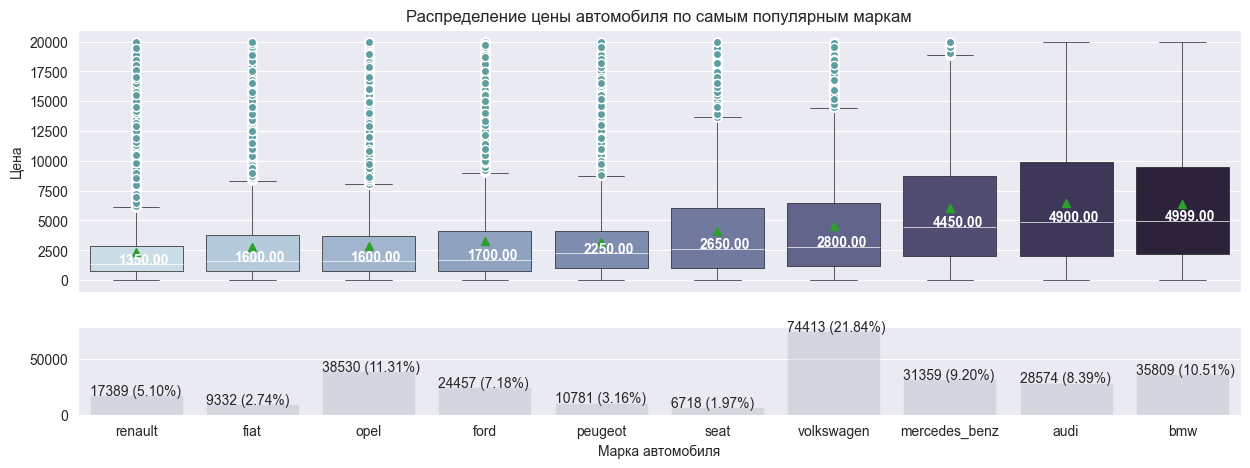

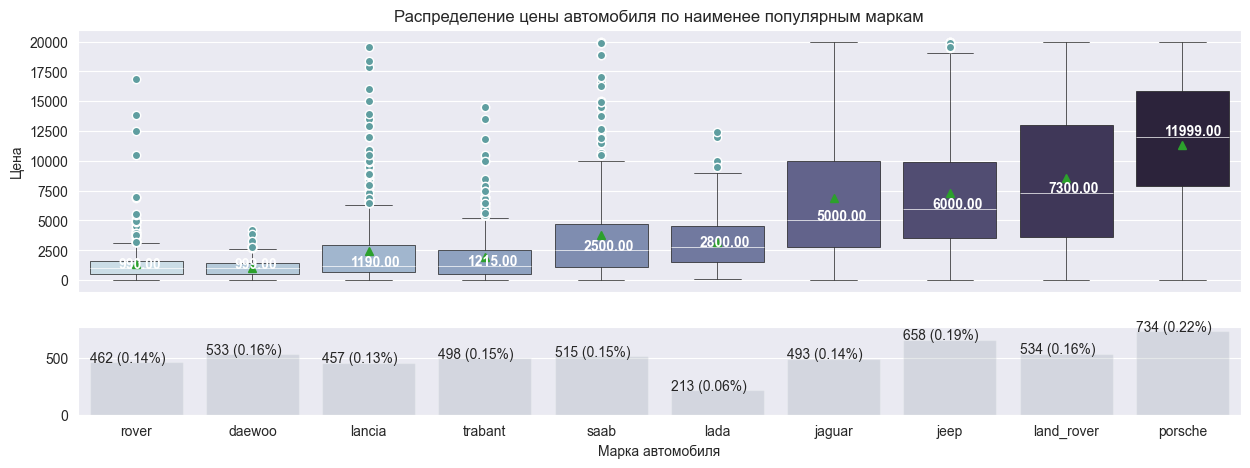

In [32]:
print(df['brand'].unique())
get_boxplot(df, 'brand', top_ten=10)
get_boxplot(df, 'brand', top_ten=-10)

#### Модель автомобиля

In [33]:
print(sorted(df.dropna(subset=['model'])['model'].unique()))
get_count_by_group(df, 'model').sort_values(by='count', ascending=False).T

['100', '145', '147', '156', '159', '1_reihe', '1er', '200', '2_reihe', '300c', '3_reihe', '3er', '4_reihe', '500', '5_reihe', '5er', '601', '6_reihe', '6er', '7er', '80', '850', '90', '900', '9000', '911', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a8', 'a_klasse', 'accord', 'agila', 'alhambra', 'almera', 'altea', 'amarok', 'antara', 'arosa', 'astra', 'auris', 'avensis', 'aveo', 'aygo', 'b_klasse', 'b_max', 'beetle', 'berlingo', 'bora', 'boxster', 'bravo', 'c1', 'c2', 'c3', 'c4', 'c5', 'c_klasse', 'c_max', 'c_reihe', 'caddy', 'calibra', 'captiva', 'carisma', 'carnival', 'cayenne', 'cc', 'ceed', 'charade', 'cherokee', 'citigo', 'civic', 'cl', 'clio', 'clk', 'clubman', 'colt', 'combo', 'cooper', 'cordoba', 'corolla', 'corsa', 'cr_reihe', 'croma', 'crossfire', 'cuore', 'cx_reihe', 'defender', 'delta', 'discovery', 'doblo', 'ducato', 'duster', 'e_klasse', 'elefantino', 'eos', 'escort', 'espace', 'exeo', 'fabia', 'fiesta', 'focus', 'forester', 'forfour', 'fortwo', 'fox', 'freelander', 'fusion', 

model,golf,other,3er,polo,corsa,astra,passat,a4,c_klasse,5er,e_klasse,a3,focus,fiesta,a6,twingo,2_reihe,transporter,fortwo,a_klasse,vectra,1er,mondeo,clio,touran,3_reihe,punto,zafira,megane,ibiza,ka,lupo,octavia,fabia,cooper,clk,micra,x_reihe,caddy,80,sharan,scenic,omega,laguna,civic,leon,1_reihe,6_reihe,i_reihe,slk,galaxy,tt,meriva,yaris,mx_reihe,7er,kangoo,m_klasse,500,one,arosa,b_klasse,s_klasse,vito,bora,colt,escort,berlingo,beetle,sprinter,tigra,v40,transit,fox,z_reihe,swift,c_max,corolla,panda,tiguan,seicento,insignia,4_reihe,v70,156,primera,a1,scirocco,stilo,espace,touareg,147,almera,avensis,grand,a5,qashqai,a8,eos,c3,signum,c5,c4,matiz,5_reihe,s_max,agila,aygo,kaefer,ducato,getz,combo,carisma,100,sl,c2,c1,cordoba,forfour,a2,altea,cuore,superb,picanto,601,rio,alhambra,jetta,up,rav,accord,sorento,cr_reihe,kadett,toledo,doblo,logan,kuga,modus,bravo,voyager,santa,verso,jazz,vivaro,fusion,ptcruiser,sandero,roomster,carnival,xc_reihe,viano,v50,ceed,sportage,galant,auris,tucson,cayenne,boxster,cl,impreza,lancer,jimny,freelander,phaeton,159,850,x_trail,q7,pajero,duster,ypsilon,clubman,calibra,c_reihe,spider,roadster,yeti,mustang,x_type,captiva,cherokee,legacy,6er,v_klasse,s60,300c,sirion,rx_reihe,justy,cc,note,niva,forester,spark,s_type,m_reihe,outlander,r19,aveo,900,antara,juke,wrangler,exeo,q5,kalos,90,g_klasse,citigo,navara,lanos,mii,discovery,911,range_rover,defender,glk,crossfire,cx_reihe,nubira,range_rover_sport,lybra,move,145,croma,v60,terios,lodgy,delta,9000,charade,b_max,musa,materia,200,kappa,amarok,q3,samara,gl,elefantino,kalina,serie_2,i3,rangerover,serie_3,range_rover_evoque,serie_1
count,28246.00,23707.00,19179.00,12628.00,12197.00,10475.00,9835.00,9642.00,8174.0,7665.00,6631.00,6026.00,5750.00,5656.00,5368.00,4817.00,4763.0,4687.00,4296.00,4133.00,4094.0,3497.00,3487.00,3459.00,3428.00,3425.00,3241.00,2994.00,2802.00,2640.00,2612.00,2537.00,2092.00,2060.0,1934.00,1784.00,1719.0,1571.00,1554.00,1516.00,1454.00,1417.00,1335.00,1311.00,1297.00,1284.00,1272.00,1260.00,1223.00,1213.00,1127.00,1066.00,1036.0,1029.0,997.00,986.00,942.00,937.00,908.00,887.00,872.00,872.00,863.00,860.00,852.00,846.00,841.00,814.00,810.00,755.00,749.00,745.00,744.00,736.00,709.00,686.0,682.0,675.0,666.0,657.00,645.00,634.00,624.00,619.00,604.00,594.00,593.00,591.00,582.00,582.00,573.00,564.00,563.00,561.00,556.00,534.00,528.00,516.00,513.00,499.00,482.00,477.00,443.00,440.00,436.00,431.00,429.00,425.00,420.00,420.00,413.00,406.00,402.00,396.00,394.00,391.00,386.00,383.00,380.00,368.00,368.00,364.00,363.00,362.00,360.00,356.0,352.0,349.0,347.0,346.0,344.0,339.0,333.0,326.0,323.00,321.00,320.00,317.00,316.00,311.00,311.00,310.00,308.00,299.00,299.00,298.00,295.00,292.00,273.00,269.00,266.00,256.00,252.00,249.00,246.00,245.00,234.00,230.00,229.00,220.00,220.00,216.00,216.00,212.00,212.00,210.00,208.00,206.00,206.00,204.00,204.00,203.00,201.00,200.00,194.00,192.00,189.00,180.00,174.00,172.00,171.00,167.00,162.00,157.00,146.00,145.00,145.00,139.00,138.00,137.00,136.00,134.00,129.00,126.00,126.00,123.00,123.00,121.00,120.00,117.00,117.00,114.00,106.00,102.00,100.00,100.00,97.00,95.00,94.00,93.00,91.00,90.00,86.00,81.00,78.00,75.00,75.00,75.00,64.00,64.00,63.00,61.00,54.00,51.00,51.00,46.00,45.00,42.00,35.00,35.00,34.00,28.00,27.00,26.00,23.00,18.00,17.0,15.0,13.0,13.0,12.0,12.0,11.0,9.0,8.0,8.0,4.0,3.0,2.0,1.0
percentage,8.29,6.96,5.63,3.71,3.58,3.07,2.89,2.83,2.4,2.25,1.95,1.77,1.69,1.66,1.58,1.41,1.4,1.38,1.26,1.21,1.2,1.03,1.02,1.02,1.01,1.01,0.95,0.88,0.82,0.77,0.77,0.74,0.61,0.6,0.57,0.52,0.5,0.46,0.46,0.44,0.43,0.42,0.39,0.38,0.38,0.38,0.37,0.37,0.36,0.36,0.33,0.31,0.3,0.3,0.29,0.29,0.28,0.27,0.27,0.26,0.26,0.26,0.25,0.25,0.25,0.25,0.25,0.24,0.24,0.22,0.22,0.22,0.22,0.22,0.21,0.2,0.2,0.2,0.2,0.19,0.19,0.19,0.18,0.18,0.18,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.16,0.16,0.16,0.15,0.15,0.15,0.15,0.14,0.14,0.13,0.13,0.13,0.13,0.13,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.1,0.1,0.1,0.1,0.1,0

In [34]:
df['model_sep'] = df['model'].str.replace('_', ' ')
unique_models_by_brand = (
    df.dropna(subset=['model_sep'], axis=0)
    .groupby('brand')['model_sep'].unique().to_dict()
)
to_omit = ['reihe', 'klasse', 'serie', 'type', 'other']
similar_values = get_similar_values(unique_models_by_brand, to_omit)

df = df.drop('model_sep', axis=1)

In [35]:
similar_values

{'90': ['9000', '900'],
 'accord': ['cc'],
 'alhambra': ['bora'],
 'auris': ['yaris'],
 'aveo': ['bravo'],
 'carnival': ['niva'],
 'cl': ['clubman', 'clk', 'clio'],
 'defender': ['defender'],
 'discovery': ['discovery'],
 'duster': ['roadster'],
 'freelander': ['lancer', 'freelander'],
 'gl': ['wrangler', 'glk'],
 'grand': ['grand', 'grand'],
 'jetta': ['tt'],
 'ka': ['kappa', 'kangoo', 'kalos', 'kalina', 'kaefer', 'kadett'],
 'leon': ['ypsilon'],
 'lupo': ['up'],
 'matiz': ['matiz'],
 'range rover': ['rangerover', 'range rover sport', 'range rover evoque'],
 'rio': ['terios', 'sirion'],
 'sl': ['slk'],
 'superb': ['up']}

In [36]:
for model in ('defender', 'discovery', 'freelander', 'grand', 'matiz',
              'range_rover', 'rangerover'):
    print(f'\033[1m{model}\033[0m')
    print(df.query(f'model == "{model}"')['brand'].value_counts(), '\n')

defender
land_rover    74
rover          1
Name: brand, dtype: int64 

discovery
land_rover    76
rover          2
Name: brand, dtype: int64 

freelander
land_rover    210
rover           2
Name: brand, dtype: int64 

grand
jeep        237
suzuki      209
chrysler    110
Name: brand, dtype: int64 

matiz
chevrolet    282
daewoo       158
Name: brand, dtype: int64 

range_rover
land_rover    75
Name: brand, dtype: int64 

rangerover
rover    4
Name: brand, dtype: int64 



In [37]:
df.loc[df['model'] == 'rangerover', 'model'] = 'range_rover'
display(
    df.dropna(subset=['model'], axis=0)
    .query('brand == "rover" and model != "other"')
)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,postal_code,days_since_creation,year_created,month_created,day_created,month_crawled,day_crawled
4850,3100.0,convertible,1999,manual,120,discovery,150000,12,petrol,rover,no,47623,22,2016,3,14,3,14
27949,1050.0,small,1998,manual,103,range_rover,150000,10,petrol,rover,NaN,49084,18,2016,3,18,3,18
108768,2800.0,suv,1999,manual,0,freelander,150000,10,gasoline,rover,NaN,17279,5,2016,3,17,3,17
117409,16900.0,other,2007,auto,190,range_rover,150000,7,gasoline,rover,no,67549,13,2016,3,24,3,24
169654,2500.0,suv,1996,manual,0,range_rover,150000,0,gasoline,rover,no,16552,0,2016,3,27,3,27
169747,1950.0,suv,2000,auto,177,freelander,150000,1,petrol,rover,no,83278,30,2016,3,7,3,7
269405,550.0,small,1997,manual,75,defender,150000,7,petrol,rover,no,88518,26,2016,3,10,3,10
279463,3300.0,NaN,2017,manual,135,range_rover,150000,2,gasoline,rover,no,15374,8,2016,3,30,3,30
338880,2800.0,suv,1991,manual,113,discovery,150000,12,gasoline,rover,NaN,33442,2,2016,3,24,3,24


In [38]:
df.loc[(df['brand'] == "rover")
       & (df['model'] != 'other'), 'brand'] = 'land_rover'

В названиях присутствовало незначительное количество неявных дубликатов.   
Удалим пропуски.

In [39]:
df = df.dropna(subset=['model'])

#### Тип топлива

['petrol' 'gasoline' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']


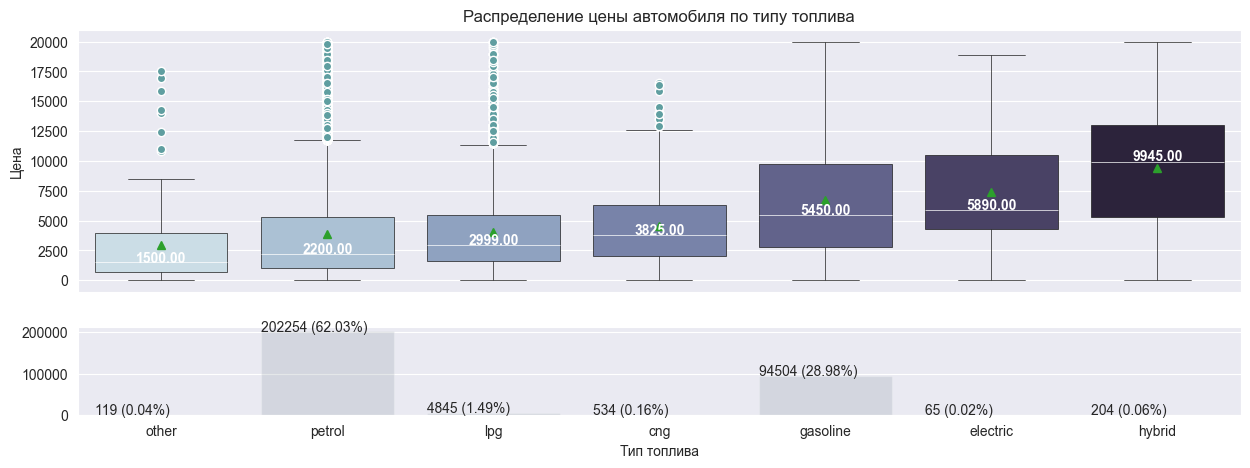

In [40]:
print(df['fuel_type'].unique())
get_boxplot(df, 'fuel_type')

In [41]:
df.query('fuel_type in ("hybrid", "electric") and gearbox == "manual"')

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,postal_code,days_since_creation,year_created,month_created,day_created,month_crawled,day_crawled
14866,1.0,NaN,2016,manual,107,golf,5000,0,electric,volkswagen,no,26524,0,2016,4,4,4,4
18572,12000.0,coupe,2011,manual,114,cr_reihe,60000,9,hybrid,honda,no,96450,9,2016,3,27,3,27
44601,250.0,sedan,1998,manual,72,golf,150000,0,electric,volkswagen,NaN,76831,15,2016,3,22,3,22
50315,2000.0,NaN,2016,manual,90,combo,150000,10,hybrid,opel,NaN,26624,11,2016,3,26,3,26
52741,1100.0,NaN,2017,manual,0,a4,150000,10,hybrid,audi,NaN,89522,13,2016,3,23,3,23
57426,9990.0,coupe,2010,manual,114,cr_reihe,70000,6,hybrid,honda,no,58089,22,2016,3,14,3,14
61203,11000.0,coupe,2010,manual,114,cr_reihe,60000,5,hybrid,honda,no,45883,14,2016,3,23,3,23
71224,800.0,sedan,1997,manual,102,a4,150000,6,electric,audi,no,99198,4,2016,3,15,3,15
73446,1.0,wagon,2001,manual,116,a4,150000,12,hybrid,audi,yes,4720,0,2016,4,7,4,7
79617,10500.0,coupe,2010,manual,114,cr_reihe,50000,5,hybrid,honda,no,50765,8,2016,3,30,3,30


In [42]:
(
    df.query('fuel_type == "gasoline"')
    [['price', 'registration_year', 'power', 'postal_code']].describe()
)

,price,registration_year,power,postal_code
count,94504.000000,94504.000000,94504.000000,94504.000000
mean,6732.094028,2005.712002,129.314960,51487.544316
std,4906.425594,18.557982,179.584763,25733.393591
min,1.000000,1000.000000,0.000000,1067.000000
25%,2800.000000,2003.000000,101.000000,30890.000000
50%,5450.000000,2006.000000,131.000000,50997.000000
75%,9777.000000,2009.000000,160.000000,72280.000000
max,20000.000000,6500.000000,19211.000000,99998.000000


In [43]:
(
    df.query('fuel_type.isna()')
    [['price', 'registration_year', 'power', 'postal_code']].describe()
)

,price,registration_year,power,postal_code
count,23551.000000,23551.000000,23551.000000,23551.000000
mean,2628.737506,2011.393699,85.862554,48486.151543
std,3338.012700,217.306005,300.558786,25666.013017
min,1.000000,1000.000000,0.000000,1067.000000
25%,599.000000,1998.000000,0.000000,27617.500000
50%,1350.000000,2003.000000,75.000000,47119.000000
75%,3200.000000,2016.000000,116.000000,66780.000000
max,20000.000000,9999.000000,19312.000000,99994.000000


In [44]:
(
    df.query('fuel_type == "petrol"')
    [['price', 'registration_year', 'power', 'postal_code']].describe()
)

,price,registration_year,power,postal_code
count,202254.000000,202254.000000,202254.000000,202254.000000
mean,3878.551198,2002.270833,106.205672,50882.631829
std,4132.435573,37.906731,166.860834,25780.298577
min,1.000000,1000.000000,0.000000,1067.000000
25%,999.000000,1998.000000,65.000000,30655.000000
50%,2200.000000,2001.000000,100.000000,49681.000000
75%,5300.000000,2006.000000,135.000000,71543.000000
max,20000.000000,9999.000000,20000.000000,99998.000000


Слова `petrol` и `gasoline` имеют один и тот же смысл. Но в одних странах для обозначения топлива используется `gasoline`, в других – `petrol`. Можно было бы предположить, что объявления относятся к разным странам, но распределение почтовых индексов для автомобилей с типом топлива `gasoline` соответствует распределению для транспортных средств с типом топлива `petrol`. При этом автомобили с типом топлива `gasoline` стоят значительно дороже.  
Электромобили и гибридные автомобили с механической коробкой передача - аномалии. 

In [45]:
df = df.drop(
    df.query('fuel_type in ("electric", "hybrid") and gearbox == "manual"')
    .index, axis=0
)

#### Была ли машина в ремонте

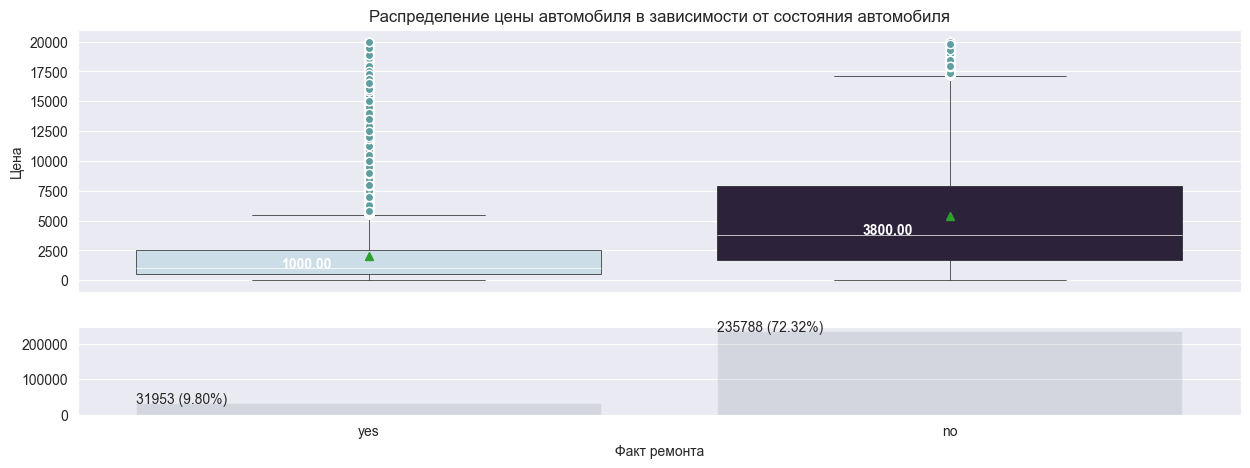

In [46]:
get_boxplot(df, 'repaired')

In [47]:
na_median_price = df.query('repaired.isna()')['price'].median()
print('Медианная цена автомобиля для строк с пропусками в столбце '
      f'"repaired": {na_median_price}')

Медианная цена автомобиля для строк с пропусками в столбце "repaired": 1599.0


Значение `yes` в столбце `repaired` может указывать на то, что транспортное средство попадало в ДТП. Поэтому пропуски, возможно, обусловлены нежеланием пользователей отпугнуть потенциальных покупателей. 
Медианная цена объектов с пропусками в столбце `repaired` существенно ближе к медианной цене отремонтированных автомобилей, что также могло бы говорить в пользу нашей гипотезы. Тем не менее медианная цена объектов с пропусками значительно выше цены автомобилей, которые были в ремонте. Поэтому заполнять пропуски значением `yes`, вероятно, было бы не совсем правильно.  
Создадим отдельную категорию `unknown` для пользователей, пожелавших не указывать был ли автомобиль в ремонте.

In [48]:
df['repaired'] = df['repaired'].fillna('unknown')

#### Тип коробки передач

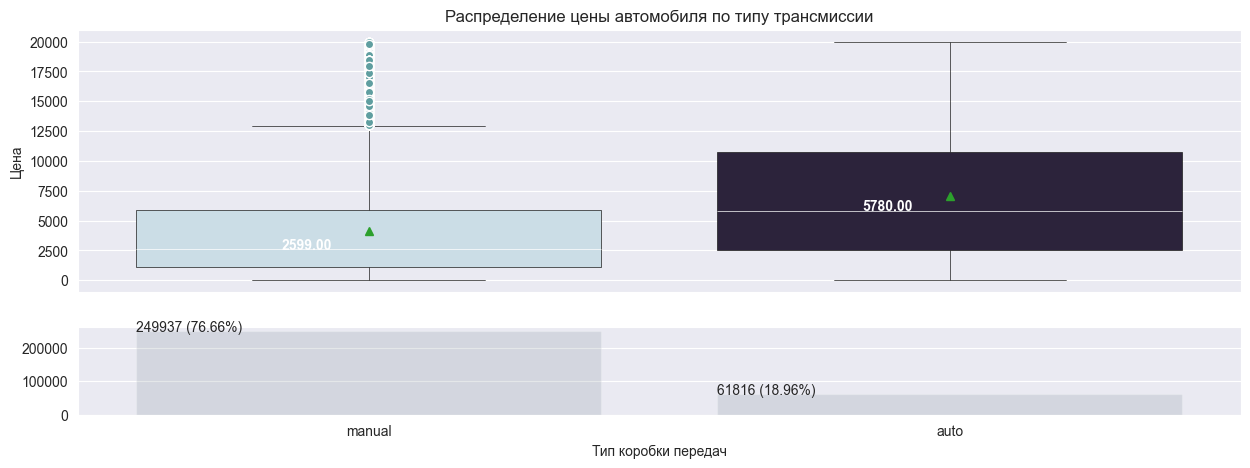

In [49]:
get_boxplot(df, 'gearbox')

In [50]:
gearbox_cols = ['price', 'power', 'registration_year', 'repaired']
print('Механическая коробка передач')
display(df.query('gearbox == "manual"')[gearbox_cols].describe())
print('Строки с пропусками')
display(df.query('gearbox.isna()')[gearbox_cols].describe())
print('Автоматическая коробка передач')
df.query('gearbox == "auto"')[gearbox_cols].describe()

Механическая коробка передач


,price,power,registration_year
count,249937.000000,249937.000000,249937.000000
mean,4139.844157,104.204684,2003.303484
std,4147.129905,170.502667,23.247376
min,1.000000,0.000000,1000.000000
25%,1100.000000,70.000000,1999.000000
50%,2599.000000,101.000000,2003.000000
75%,5850.000000,131.000000,2008.000000
max,20000.000000,19312.000000,7100.000000


Строки с пропусками


,price,power,registration_year
count,14270.000000,14270.000000,14270.000000
mean,2619.897407,39.954730,2014.998178
std,3177.856215,164.713505,294.277693
min,1.000000,0.000000,1000.000000
25%,580.000000,0.000000,1999.000000
50%,1500.000000,0.000000,2003.000000
75%,3300.000000,71.000000,2008.000000
max,20000.000000,12510.000000,9999.000000


Автоматическая коробка передач


,price,power,registration_year
count,61816.000000,61816.000000,61816.000000
mean,7038.363725,160.070904,2004.011728
std,5355.738010,221.411820,36.093344
min,1.000000,0.000000,1931.000000
25%,2499.000000,114.000000,2000.000000
50%,5780.000000,160.000000,2004.000000
75%,10790.000000,199.000000,2008.000000
max,20000.000000,20000.000000,8200.000000


Несмотря на увеличение доли автомобилей с автоматической трансмиссией в последние годы,
большинство автовладельцев в Европе по-прежнему предпочитают ручную коробку передач. Поэтому пользователи могли не посчитать нужным указывать механическую коробку передач в объявлении. Если судить по цене и мощности, то объекты с пропусками в столбце с информацией о коробке передач значительно ближе к объектам с ручной коробкой передач, что также говорит в пользу выдвинутой гипотезы.  
Заполним пропуски значением `manual`

In [51]:
df['gearbox'] = df['gearbox'].fillna('manual')
df = df.drop(
    df.query('fuel_type in ("electric", "hybrid") and gearbox == "manual"')
    .index, axis=0
)

#### Количество дней между созданием анкеты и последним визитом пользователя

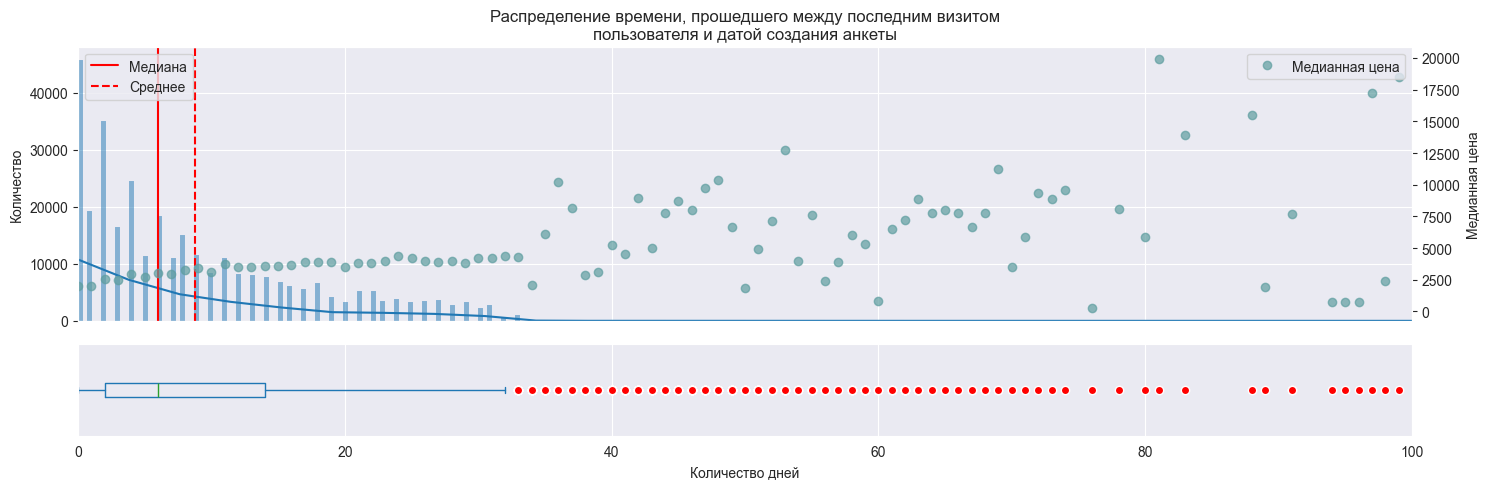

In [52]:
get_histogram(df, 'days_since_creation')
plt.xlim(0, 100);

#### Год регистрации автомобиля

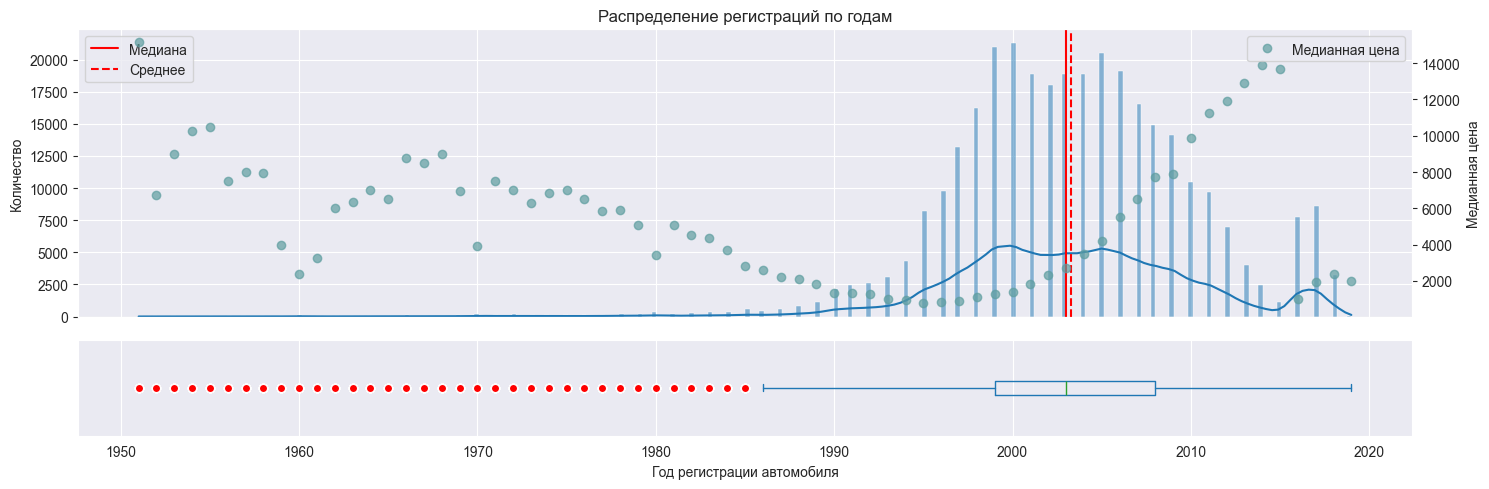

In [53]:
get_histogram(df.query('1950 < registration_year < 2023'), 'registration_year')

Автомобили, которым около тридцати лет и более, могут считаться раритетными, поэтому медианная цена на них убывает по мере возрастания значения года. Для предсказания цены подобных автомобилей следует создать отдельную модель.  
Для остальных объектов в наборе данных медианная цена позитивно коррелирует с годом регистрации.  
Анкеты были скачаны в 2016 году, при этом в столбце с годом регистрации встречаются значения, превышающие 2016. Медианные цены для рассмотренных аномалий скорее соответствуют началу 2000-х годов.  
Удалим аномалии и выбросы.

In [54]:
df = df.drop(
    df.query('registration_year < 1990 or registration_year > 2016').index,
    axis=0
)
df = df.drop(
    df.query('registration_year == 2016 and registration_month > 4').index,
    axis=0
)

#### Месяц регистрации автомобиля

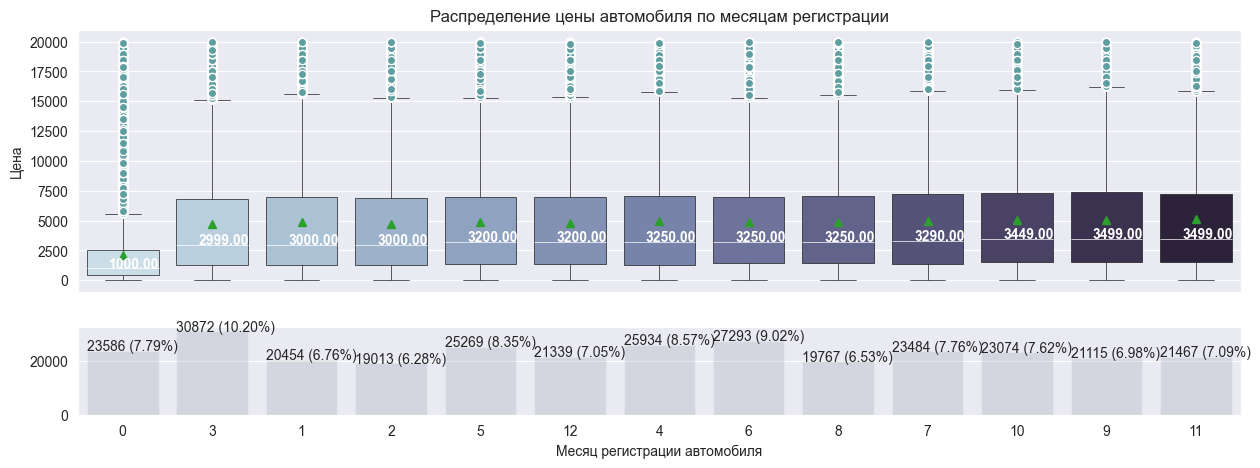

In [55]:
get_boxplot(df, 'registration_month')

Маловероятно, что значение `0` – это январь, т.к. медианная цена сильно ниже медианных значений для других месяцев. Пользователь мог не посчитать нужным указывать месяц регистрации, если транспортное средство было достаточно старым или после ДТП. Поэтому нулями, вероятно, заполняли пропуски.   
Распределения выглядят логично: автомобили, зарегистрированных в конце года, в среднем стоят дороже транспортных средств, зарегистрированных в начале года.

#### Мощность

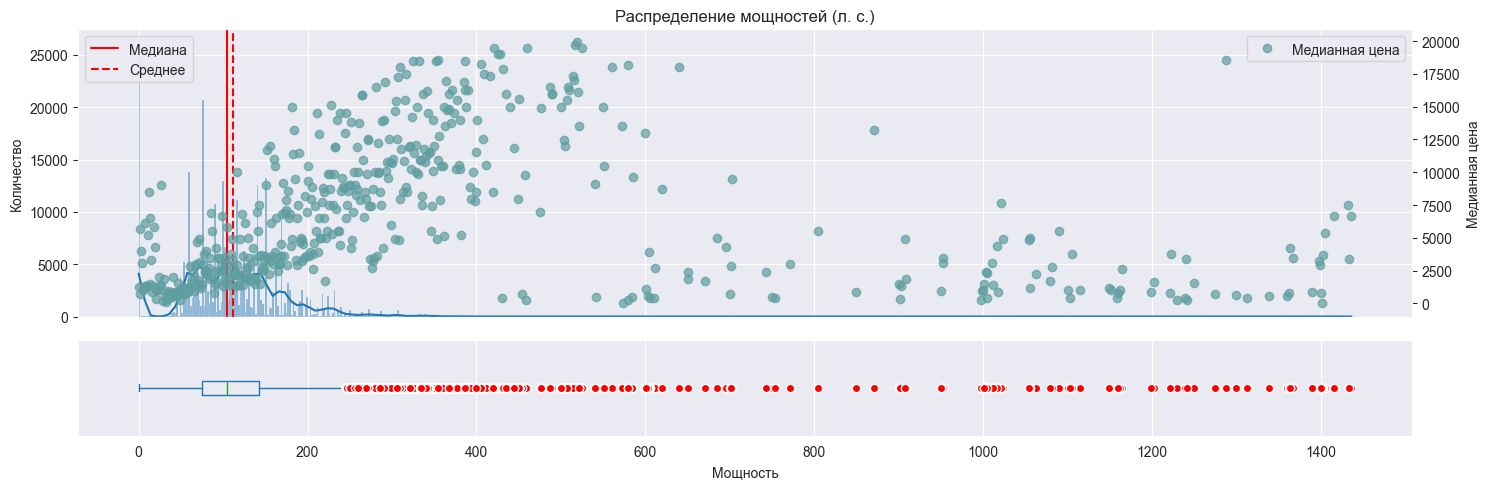

In [56]:
get_histogram(df.query('power < 1500'), 'power')

In [57]:
df.loc[df['power'] == 0, 'power'] = float('nan')
print(df.query('power < 40 or power > 450').shape[0] / df.shape[0])
df.query('0 < power < 40')['model'].value_counts()

0.002540746100499889


other       110
seicento     41
polo         25
corsa        25
601          20
           ... 
civic         1
passat        1
c_max         1
stilo         1
navara        1
Name: model, Length: 61, dtype: int64

Значения `0`, вероятно, использовали для заполнения пропусков.  
Примерно до 450 л. с. мощность положительно коррелирует с медианной ценой.  
Значения, превосходящие 450 л. с., могли появиться по причине того, что часть пользователей указали объём двигателя (в $см^3$) вместо мощности или опечатались. В некоторых случаях указанная мощность действительно будет соответствовать реальной, но таких автомобилей немного – их можно считать выбросами. Также выбросами можно считать транспортные средства мощностью ниже 40 л. с.  
Удалим объекты мощностью свыше 450 л. с./ниже 40 л. с.

In [58]:
df = df.drop(df.query('power < 40 or power > 450').index, axis=0)

Для заполнения пропусков воспользуемся модой, сгруппировав данные по марке автомобиля, модели и коробке передач.

In [59]:
values = (
    df.groupby(['brand', 'model', 'gearbox'])['power']
    .transform(lambda x: x.mode(dropna=False).iloc[0])
)
df['power'] = df['power'].fillna(values)
df = df.dropna(subset=['power'], axis=0)

#### Пробег

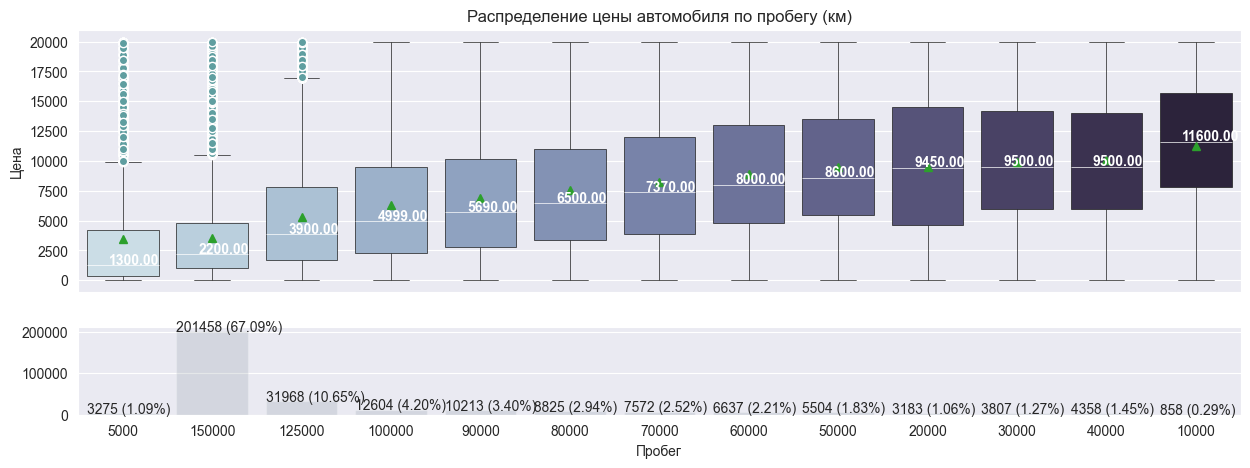

In [60]:
get_boxplot(df, 'kilometer')

In [61]:
km_cols = ['price', 'registration_year', 'power']
for num in (70000, 5000, 150000):
    print(f'\nПробег {num} км')
    display(df.query(f'kilometer == {num}')[km_cols].describe())
    print(df.query(f'kilometer == {num}')['repaired']
          .value_counts(normalize=True))


Пробег 70000 км


,price,registration_year,power
count,7572.000000,7572.000000,7572.000000
mean,8236.410988,2007.264395,112.441891
std,5224.030545,4.749527,46.782132
min,1.000000,1990.000000,40.000000
25%,3900.000000,2005.000000,75.000000
50%,7370.000000,2009.000000,105.000000
75%,12000.000000,2011.000000,140.000000
max,20000.000000,2016.000000,420.000000


no         0.863576
unknown    0.089805
yes        0.046619
Name: repaired, dtype: float64

Пробег 5000 км


,price,registration_year,power
count,3275.000000,3275.000000,3275.000000
mean,3470.763969,2002.897099,109.616794
std,4759.264351,7.282801,50.284238
min,1.000000,1990.000000,40.000000
25%,400.000000,1998.000000,75.000000
50%,1300.000000,2001.000000,101.000000
75%,4200.000000,2007.000000,136.000000
max,20000.000000,2016.000000,431.000000


unknown    0.442443
no         0.441832
yes        0.115725
Name: repaired, dtype: float64

Пробег 150000 км


,price,registration_year,power
count,201458.000000,201458.000000,201458.000000
mean,3567.714516,2001.689772,123.449071
std,3661.575342,4.764096,52.895272
min,1.000000,1990.000000,40.000000
25%,1000.000000,1998.000000,82.000000
50%,2200.000000,2001.000000,116.000000
75%,4800.000000,2005.000000,150.000000
max,20000.000000,2016.000000,450.000000


no         0.700156
unknown    0.184877
yes        0.114967
Name: repaired, dtype: float64


Медианная цена ожидаемо отрицательно коррелирует с пробегом автомобилей.  
Аномальной выглядит медианная цена для автомобилей с пробегом 5000 км.  
Распределения цен, регистраций по годам, а также доля отремонтированных автомобилей для объектов с пробегом 5000 км больше подошли бы пробегу превышающему 150 000 км.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300262 entries, 0 to 354368
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   price                300262 non-null  float64
 1   vehicle_type         288904 non-null  object 
 2   registration_year    300262 non-null  int16  
 3   gearbox              300262 non-null  object 
 4   power                300262 non-null  float64
 5   model                300262 non-null  object 
 6   kilometer            300262 non-null  int32  
 7   registration_month   300262 non-null  int8   
 8   fuel_type            283965 non-null  object 
 9   brand                300262 non-null  object 
 10  repaired             300262 non-null  object 
 11  postal_code          300262 non-null  int32  
 12  days_since_creation  300262 non-null  int16  
 13  year_created         300262 non-null  int16  
 14  month_created        300262 non-null  int8   
 15  day_created      

#### Обработка пропусков

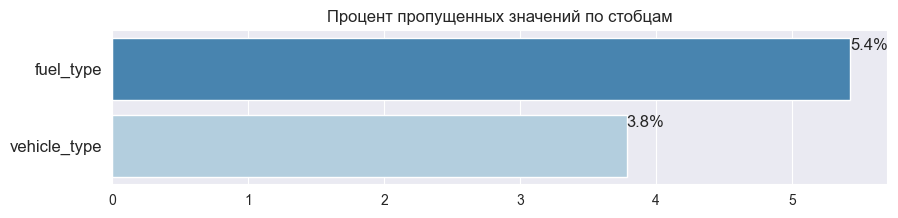

In [63]:
df = df.drop(['day_created', 'day_crawled'], axis=1)
get_missing_values_barplot(df)

Пропуски в столбце `fuel_type` заполним с помощью модели случайного леса, в столбце `vehicle_type` - удалим.

In [64]:
df = df.dropna(subset=['vehicle_type'], axis=0)

In [65]:
df_train, df_test = train_test_split(df, test_size=.2, random_state=SEED)
df_test.shape[0] / df_train.shape[0]

0.25000108167512536

Для заполнения пропусков обучим модель на выборке `df_train`.

In [66]:
ft_to_drop = ['fuel_type', 'price']
df_ft = df_train.copy()
df_ft = df_ft.dropna(subset=['fuel_type'], axis=0)
X_ft = df_ft.drop(ft_to_drop, axis=1)
y_ft = df_ft['fuel_type']
le = LabelEncoder()
y_ft = le.fit_transform(y_ft)

In [67]:
class RFImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop=[], target='fuel_type', params={}):
        self.columns_to_drop = columns_to_drop
        self.target = target
        selector = make_column_selector(dtype_include='object')
        self.le = LabelEncoder()
        smoothing = 10
        if params:
            params = params.copy()
            smoothing = params.pop('smoothing')
        encoder = TargetEncoder(smoothing=smoothing)
        transformer = make_column_transformer(
            (encoder, selector), remainder='passthrough'
        )
        model = RandomForestClassifier(**params, n_jobs=-1, random_state=SEED)
        self.pipe = make_pipeline(transformer, StandardScaler(), model)

    def fit(self, X, y=None):
        features_local = X.drop(self.columns_to_drop, axis=1).copy()
        features_local = features_local.dropna()
        X_local = features_local.drop(self.target, axis=1)
        y_local = features_local[self.target]
        y_local = self.le.fit_transform(y_local)
        self.pipe.fit(X_local, y_local)
        return self

    def transform(self, X, y=None):
        features_local = X.drop(self.columns_to_drop, axis=1).copy()
        features_na = features_local.loc[features_local[self.target].isna()]
        X_na = features_na.drop(self.target, axis=1)
        y_na = features_na[self.target]
        y_na = self.pipe.predict(X_na)
        features_local.loc[features_local[self.target].isna(),
                           self.target] = self.le.inverse_transform(y_na)
        difference = X.columns.difference(features_local.columns).to_list()
        if difference:
            features_local[difference] = X[difference]
            features_local = features_local.reindex(X.columns, axis=1)
        return features_local

In [68]:
train_na_ids = df_train.query('fuel_type.isna()').index
test_na_ids = df_test.query('fuel_type.isna()').index
check_train = df_train.drop(train_na_ids, axis=0)
check_test = df_test.drop(test_na_ids, axis=0)

In [69]:
def objective(trial, X, y, depth=(2, 35), split=(2, 20),
              features=(4, 14), weight=None, scoring='f1_micro'):
    rf_params = {
        'n_estimators': trial.suggest_int('n_estimators', 20, 100),
        'max_depth': trial.suggest_int('max_depth', *depth),
        'max_features': trial.suggest_int('max_features', *features),
        'min_samples_split': trial.suggest_int('min_samples_split',
                                               *split)
    }
    smoothing = trial.suggest_int('smoothing', 1, 100)
    scaler = StandardScaler()
    local_selector = make_column_selector(dtype_include='object')
    encoder = TargetEncoder(smoothing=smoothing)
    transformer = make_column_transformer(
        (encoder, local_selector),
        remainder='passthrough'
    )
    model = RandomForestClassifier(n_jobs=-1, random_state=SEED,
                                   class_weight=weight, **rf_params)
    pipeline = make_pipeline(transformer, scaler, model)
    cv = StratifiedKFold(5, random_state=SEED, shuffle=True)
    return cross_val_score(
        pipeline, X, y, scoring=scoring, n_jobs=-1, cv=cv
    ).mean()

In [70]:
# func = lambda trial: objective(trial, X_ft, y_ft)
# sampler = optuna.samplers.TPESampler(seed=SEED)
# rf_study = optuna.create_study(direction='maximize', sampler=sampler)
# rf_study.optimize(func, n_trials=100, show_progress_bar=True)

In [71]:
# rf_best_params = rf_study.best_params
# rf_best_params

rf_best_params = {
    'n_estimators': 83,
    'max_depth': 30,
    'max_features': 10,
    'min_samples_split': 3,
    'smoothing': 8
}

Заполним пропуски

In [72]:
imputer = RFImputer(columns_to_drop=['price'], params=rf_best_params)
df_train = imputer.fit_transform(df_train)
df_test = imputer.transform(df_test)

print(df_train.drop(train_na_ids, axis=0).equals(check_train))
print(df_test.drop(test_na_ids, axis=0).equals(check_test))
df_train.info()
df_test.info()

True
True
<class 'pandas.core.frame.DataFrame'>
Int64Index: 231123 entries, 104162 to 266957
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   price                231123 non-null  float64
 1   vehicle_type         231123 non-null  object 
 2   registration_year    231123 non-null  int16  
 3   gearbox              231123 non-null  object 
 4   power                231123 non-null  float64
 5   model                231123 non-null  object 
 6   kilometer            231123 non-null  int32  
 7   registration_month   231123 non-null  int8   
 8   fuel_type            231123 non-null  object 
 9   brand                231123 non-null  object 
 10  repaired             231123 non-null  object 
 11  postal_code          231123 non-null  int32  
 12  days_since_creation  231123 non-null  int16  
 13  year_created         231123 non-null  int16  
 14  month_created        231123 non-null  int8   
 15  mo

In [73]:
round(df.shape[0] / before_preprocessing, 2)

0.82

**Вывод**:  
- в столбцах `price`, `registration_year`, `brand` и `power` удалены аномалии и выбросы;
- пропуски:
    - `vehicle_type`, `model` - удалены;
    - `power` - заполнены с учётом марки автомобиля, модели и коробки передач;
    - `gearbox` - заполнены значением `manual`;
    - `repaired` - выделены в отдельную группу;
    - `fuel_type` - заполнены с помощью модели случайного леса;
- после предобработки сохранилось примерно 82% от изначального объёма данных;  
- набор данных разделён на обучающую и тестовую выборки в соотношении 4:1.

## Обучение моделей

In [74]:
def objective(trial, X, y, reg_al=(1e-3, 10), reg_lam=(1e-3, 10),
              clsmpl_btr=(0.01, 1), sbsmpl=(0.1, 1), l_rt=(0.001, 1),
              depth=(17, 28), leaves=(1, 1000),
              chld_smpls=(1, 300), cat_sm=(1, 100)):
    m = trial.suggest_float('m', 0, 1)
    local_selector = make_column_selector(dtype_include='object')
    encoder = QuantileEncoder(m=m)
    transformer = make_column_transformer(
        (encoder, local_selector),
        remainder='passthrough'
    )
    lgb_params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 170),
        'reg_alpha': trial.suggest_float('reg_alpha', *reg_al, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', *reg_lam, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree',
                                                *clsmpl_btr),
        'subsample': trial.suggest_float('subsample', *sbsmpl, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', *l_rt),
        'max_depth': trial.suggest_int('max_depth', *depth),
        'num_leaves' : trial.suggest_int('num_leaves', *leaves),
        'min_child_samples': trial.suggest_int('min_child_samples',
                                               *chld_smpls),
        'cat_smooth' : trial.suggest_int('cat_smooth', *cat_sm)
    }
    model = LGBMRegressor(**lgb_params, random_state=SEED, n_jobs=-1)
    pipeline = make_pipeline(transformer, StandardScaler(), model)
    return cross_val_score(
            pipeline, X, y, scoring='neg_root_mean_squared_error', n_jobs=-1,
            cv=KFold(5, random_state=SEED, shuffle=True)
    ).mean()

In [75]:
# features = df_train.drop('price', axis=1)
# target = df_train['price']

In [76]:
# func = lambda trial: objective(trial, features, target)
# sampler = optuna.samplers.TPESampler(seed=SEED)
# study = optuna.create_study(direction='maximize', sampler=sampler)
# study.optimize(func, n_trials=100, show_progress_bar=True)

In [77]:
# best_params = study.best_params
# best_params

best_params = {
    'm': 0.17223501677009284,
    'n_estimators': 154,
    'reg_alpha': 1.6959595384113508,
    'reg_lambda': 9.7205950955035,
    'colsample_bytree': 0.7637614960953082,
    'subsample': 0.8,
    'learning_rate': 0.06127016055630448,
    'max_depth': 27,
    'num_leaves': 1000,
    'min_child_samples': 2,
    'cat_smooth': 66
}

In [78]:
def get_pipe(reg, prms):
    if reg == 'dummy':
        return DummyRegressor(strategy='median')
    object_selector = make_column_selector(dtype_include='object')
    if reg == 'lr':
        encoder = SumEncoder()
        poly = PolynomialFeatures(degree=6, include_bias=False)
        poly_cols = ['power', 'kilometer', 'registration_year']
        transformer = make_column_transformer(
            (poly, poly_cols), (encoder, object_selector),
            remainder='passthrough'
        )
        model = LinearRegression()
    else:
        params = prms.copy()
        m = params.pop('m')
        encoder = QuantileEncoder(m=m)
        transformer = make_column_transformer(
            (encoder, object_selector), remainder='passthrough'
        )
        model = LGBMRegressor(**params, random_state=SEED, n_jobs=-1,
                              verbose=-1)
    return make_pipeline(transformer, StandardScaler(), model)


def get_time(X, X_test, y, y_test, pipeline, validation):
    start_fit = time.time()
    pipeline.fit(X, y)
    end_fit = time.time()
    start_predict = time.time()
    predicted = pipeline.predict(X_test)
    end_predict = time.time()
    fit_time = end_fit - start_fit
    predict_time = end_predict - start_predict
    if validation:
        return fit_time, predict_time
    rmse = mean_squared_error(y_test, predicted)**0.5
    r2 = r2_score(y_test, predicted)
    return rmse, r2, fit_time, predict_time


def get_scores(data=df_train, test=df_test, params={},
               regressor='lr', validation=True):
    data = data.drop_duplicates()
    features = data.drop('price', axis=1)
    target = data['price']
    pipe = get_pipe(reg=regressor, prms=params)
    if validation:
        result = cross_validate(
            pipe, features, target, n_jobs=-1,
            cv=KFold(5, random_state=SEED, shuffle=True),
            scoring=['neg_root_mean_squared_error', 'r2']
        )
        rmse = -1 * result['test_neg_root_mean_squared_error'].mean()
        r2 = result['test_r2'].mean()
    
        X_train, X_valid, y_train, y_valid = \
            train_test_split(features, target, test_size=.2, random_state=SEED)
        return rmse, r2, *get_time(X_train, X_valid, y_train,
                                   y_valid, pipe, validation)
    features_test = test.drop('price', axis=1)
    target_test = test['price']
    return get_time(features, features_test, target,
                    target_test, pipe, validation)

In [79]:
%%time
lr_scores = get_scores()

CPU times: total: 47.7 s
Wall time: 1min 14s


In [80]:
%%time
lgb_scores = get_scores(params=best_params, regressor='lgb')

CPU times: total: 42 s
Wall time: 41.4 s


In [81]:
dummy_scores = get_scores(regressor='dummy')

**Вывод**:  
- выполнен подбор гиперпараметров для моделей линейной регрессии и градиентного бустинга;  
- для оценки качества использовались метрики `RMSE` и `R2`;  
- произведён замер времени обучения.

## Анализ моделей

In [82]:
def get_idx(is_cv=False):
    idx = '(тестовая выборка)'
    if is_cv:
        idx = '(кросс-валидация)'
    return [f'RMSE {idx}', f'R2 {idx}', 'Время обучения', 'Время предсказания']

idx = get_idx(True)
cols = ['LGBMRegressor', 'LinearRegression', 'DummyRegressor']
results_df = pd.DataFrame(
    data=zip(lgb_scores, lr_scores, dummy_scores), index=get_idx(True),
    columns=cols
).applymap(lambda x: f'{x:.2f}')
results_df.loc[idx[-2:], :] = \
    results_df.loc[idx[-2:], :].applymap(lambda x: x+' сек.')
results_df

,LGBMRegressor,LinearRegression,DummyRegressor
RMSE (кросс-валидация),1379.17,1675.72,4899.93
R2 (кросс-валидация),0.91,0.87,-0.14
Время обучения,6.47 сек.,14.92 сек.,0.00 сек.
Время предсказания,0.30 сек.,0.88 сек.,0.00 сек.


**Вывод**: наименьшую среднеквадратичную ошибку продемонстрировала модель градиентного бустинга, она же была наиболее быстрой.

## Проверка лучшей модели на тестовой выборке

In [83]:
%%time
final_scores = get_scores(params=best_params, regressor='lgb',
                          validation=False)

CPU times: total: 40.6 s
Wall time: 6.71 s


In [84]:
idx = get_idx()
final = (
    pd.DataFrame(data=final_scores, index=idx, columns=[cols[0]]).T
    .applymap(lambda x: f'{x:.2f}')
)
final[idx[-2:]] = final[idx[-2:]].applymap(lambda x: x + ' сек.')
final

,RMSE (тестовая выборка),R2 (тестовая выборка),Время обучения,Время предсказания
LGBMRegressor,1355.70,0.91,6.12 сек.,0.36 сек.


**Вывод**: метрики на тестовой выборке примерно соответствуют метрикам, полученным на кросс-валидации.

## Общий вывод

**Описание данных**  
**Признаки**  
`DateCrawled` — дата скачивания анкеты из базы  
`VehicleType` — тип автомобильного кузова  
`RegistrationYear` — год регистрации автомобиля  
`Gearbox` — тип коробки передач  
`Power` — мощность (л. с.)  
`Model` — модель автомобиля  
`Kilometer` — пробег (км)  
`RegistrationMonth` — месяц регистрации автомобиля  
`FuelType` — тип топлива  
`Brand` — марка автомобиля  
`Repaired` — была машина в ремонте или нет  
`DateCreated` — дата создания анкеты  
`NumberOfPictures` — количество фотографий автомобиля  
`PostalCode` — почтовый индекс владельца анкеты (пользователя)  
`LastSeen` — дата последней активности пользователя  
**Целевой признак**  
`Price` — цена (евро)  

**Ход исследования**:  
- приведены типы данных;  
- удалены неинформативные признаки;  
- в столбцах `price`, `registration_year`, `brand` и `power` удалены аномалии и выбросы;
- пропуски:
    - `vehicle_type`, `model` - удалены;
    - `power` - заполнены с учётом марки автомобиля, модели и коробки передач;
    - `gearbox` - заполнены значением `manual`;
    - `repaired` - выделены в отдельную группу;
    - `fuel_type` - заполнены с помощью модели случайного леса;  
- после предобработки сохранилось примерно 82% от изначального объёма данных;  
- набор данных разделён на обучающую и тестовую выборки в соотношении 4:1;  
- произведено сравнение моделей линейной регрессии и градиентного бустинга на кросс-валидации;  
- модель градиентного бустинга превзошла линейную регрессию как по точности предсказаний (критерий качества - `RMSE`), так и по скорости обучения.  

Рассмотренные в ходе исследования модели предсказывали стоимость транспортного средства, зарегистрированного не ранее 1990-го года, мощностью от 40 до 450 л. с.